# k-Means Clustering

k-Means clustering is a popular unsupervised learning algorithm used to divide datasets into k distinct, non-overlapping clusters based on similarity.

## How k-Means Works:
- **Initialization**: k initial "means" (centroids) are chosen at random.
- **Assignment**: Data points are assigned to the closest centroid, forming k clusters.
- **Update**: The centroids are recalculated as the center of the newly formed clusters.
- **Iteration**: The assignment and update steps are repeated until the centroids no longer change significantly, indicating the clusters are stable.

## Characteristics of k-Means:
- Efficiency in clustering large datasets.
- Applicability to a wide range of data types and domains.
- Reliance on distance metrics (e.g., Euclidean distance) for cluster formation.

## Applications:
- Market segmentation to discover customer groups.
- Document clustering for information organization.
- Image segmentation in computer vision.

## Considerations:
- The algorithm requires specifying the number of clusters (k) in advance.
- It may converge to local optima, depending on initial centroid placement.
- It assumes clusters are spherical and evenly sized, which may not fit all datasets.

k-Means clustering is a powerful tool for data analysis, providing insights into the inherent grouping within data.


# k-Means Clustering

This notebook demonstrates the application of the k-Means clustering algorithm using a dataset of mall customers. The goal of k-Means clustering is to partition the dataset into groups (clusters) based on feature similarity.


In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

In [3]:
# Load the dataset
df = pd.read_csv('C:/Users/78641/Downloads/Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Preprocessing

Before applying k-Means, it's important to preprocess the data. Here, we'll standardize the data and possibly select relevant features for clustering.


In [4]:
# Assuming we're interested in annual income and spending score for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Determining the Optimal Number of Clusters

To determine the optimal number of clusters, we'll use the Elbow Method and silhouette scores. This method plots the sum of squared distances from each point to their assigned center for a range of cluster numbers.


c:\Users\78641\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\78641\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\78641\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\78641\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

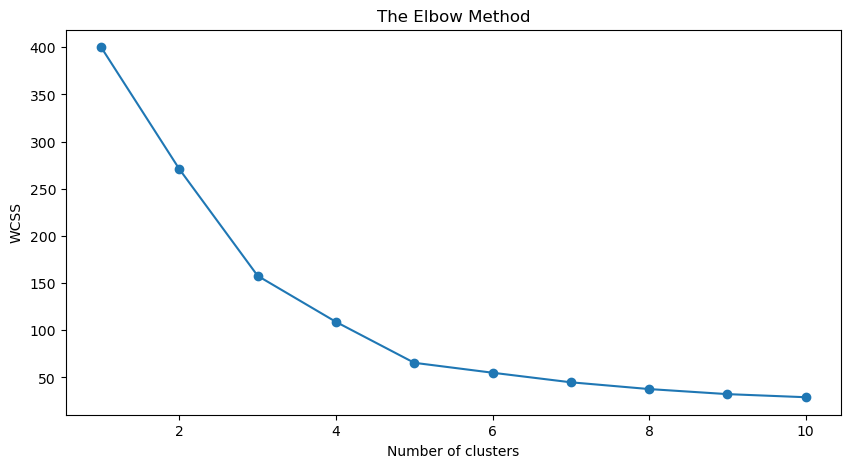

In [6]:
# Using the Elbow method to find the optimal number of clusters
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



## Elbow Method Analysis for Optimal Clusters

The Elbow Method plot above illustrates the within-cluster sum of squares (WCSS) against the number of clusters used. The WCSS is a measure of variance within each cluster, with lower values indicating tighter clusters.

### Observations:
- The WCSS decreases rapidly as the number of clusters increases from 1 to 3.
- After 3 clusters, the rate of decrease in WCSS slows down significantly, indicating less gain in explanatory power by increasing the number of clusters.

### Optimal Number of Clusters:
- The "elbow" in the plot, which is the point where the WCSS begins to drop at a slower rate, is observed at **3 clusters**.
- This suggests that expanding the number of clusters beyond 3 yields diminishing returns in terms of compactness of the clusters.

### Conclusion:
Based on the Elbow Method, the optimal number of clusters for this dataset is **3**. This is where the balance between cluster compactness and model complexity is achieved.


## Applying k-Means Clustering

Using the optimal number of clusters determined from the Elbow Method, we'll apply the k-Means algorithm to our data.


In [ ]:
kmeans_optimal = KMeans(n_clusters=3, random_state=42)
kmeans_optimal.fit(X_scaled)
cluster_labels = kmeans_optimal.labels_

# Add the cluster labels to our DataFrame
df['Cluster'] = cluster_labels


c:\Users\78641\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Visualizing the Clusters

Now that we have our clusters, let's visualize them to see how they've been partitioned in the feature space.


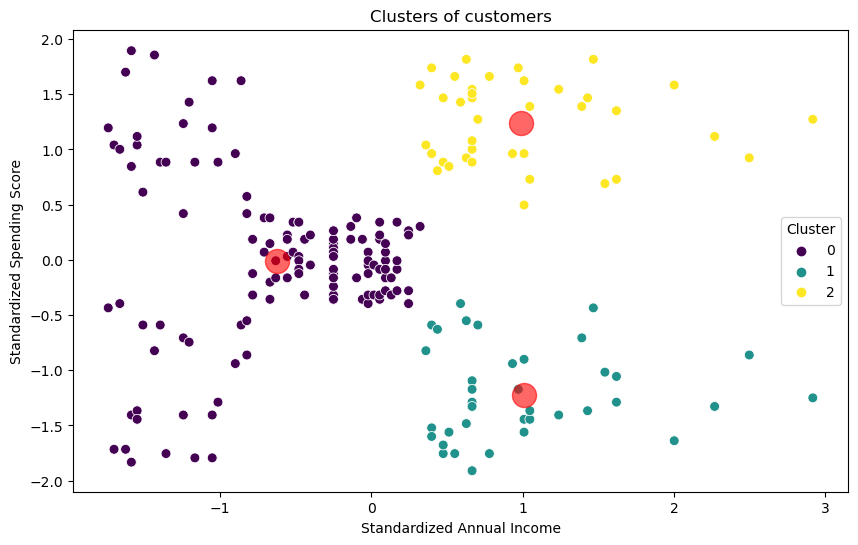

In [ ]:
# Scatter plot of the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=cluster_labels, palette='viridis', s=50)
centers = kmeans_optimal.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.6, marker='o')  # cluster centers
plt.title('Clusters of customers')
plt.xlabel('Standardized Annual Income')
plt.ylabel('Standardized Spending Score')
plt.legend(title='Cluster')
plt.show()


## k-Means Clustering Visualization Analysis

The scatter plot illustrates the clusters formed by applying the k-means algorithm to a dataset of customers, with their standardized annual income and spending score.

### Observations:
- Three distinct clusters (denoted by different colors) are visible, each representing a group of customers with similar spending scores and incomes.
- Cluster 0 (purple) appears to have customers with low annual income and low spending scores.
- Cluster 1 (aqua) includes customers with moderate annual income and spending scores.
- Cluster 2 (yellow) represents customers with high annual income and high spending scores.
- The centroids of each cluster (marked with larger dots) indicate the mean position of each cluster in terms of income and spending score.

### Insights:
- The clustering suggests a correlation between income and spending score, with three main customer profiles emerging from the data.
- Businesses can target these groups differently, tailoring marketing strategies to each cluster's characteristics.

The visualization effectively demonstrates the natural groupings within the customer data and provides actionable insights for customer segmentation.
